In [35]:
import pandas
from matplotlib import pyplot as plt

In [36]:
df = pandas.read_csv('pace_instances.csv', sep=',')
reds = ["all reds", "force p3", "force star", "twin simple", "twin complex", "icx", "heavy edge (b)", "heavy edge (s)", "heavy non-edge", "forced single merge"]
df['gap'] = df.upper - df.low_star
ds = df[df.solved==1]
df.head()

,num,n,m,solved,opt,upper,dels,adds,low_star,low_p3,...,forbs heavy non-edge,time heavy non-edge,spend heavy non-edge,lower after heavy non-edge,after forced single merge,forbs forced single merge,time forced single merge,spend forced single merge,lower after forced single merge,gap
0,1,10,11,1,3,3,3,0,3,3,...,0,0,0,3,0,0,0,3,3,0
1,2,20,68,1,7,7,7,0,7,7,...,73,0,0,7,0,0,2,7,7,0
2,3,20,73,1,42,42,35,7,40,35,...,29,0,0,40,20,25,29,0,40,2
3,4,20,75,1,32,32,21,11,32,32,...,21,0,0,32,0,0,12,32,32,0
4,5,20,97,1,46,46,39,7,41,44,...,22,0,0,41,19,20,38,3,43,5


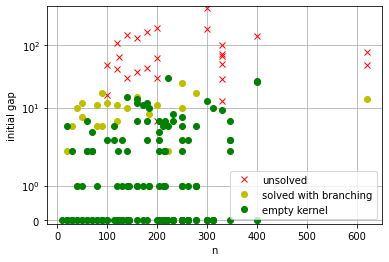

In [37]:
df[df.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')

ds[ds['after all reds']>0].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
ds[ds['after all reds']==0].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.yscale('symlog')
plt.ylim(bottom=-0.1)
plt.grid()
plt.ylabel('initial gap')
plt.savefig('plots/pace-gap.pdf', bbox_inches='tight')

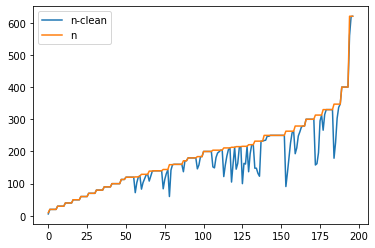

In [38]:
df['n-clean'].plot()
df['n'].plot()
plt.legend()
plt.show()

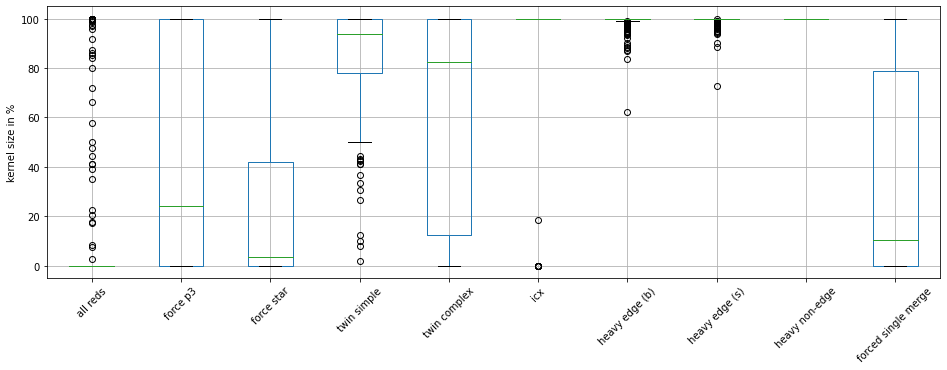

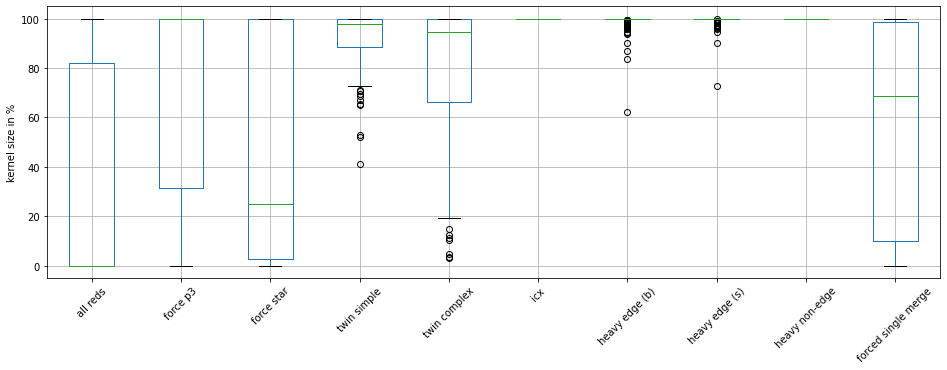

In [39]:
for r in reds:
    df[f'after% {r}'] = 100 * df[f'after {r}'] / df['n-clean']

plt.gcf().set_size_inches(16,5)
plt.ylabel('kernel size in %')
#plt.title('reduced instance after exhaustively applying a reduction')
df.boxplot(['after% ' + r for r in reds], rot=45)
plt.gca().set_xticklabels(reds)
plt.savefig('plots/pace-kernel-size.pdf', bbox_inches='tight')
plt.show()


plt.gcf().set_size_inches(16,5)
plt.ylabel('kernel size in %')
#plt.title('reduced instance after exhaustively applying a reduction')
df[df.gap>0].boxplot(['after% ' + r for r in reds], rot=45)
plt.gca().set_xticklabels(reds)
plt.savefig('plots/pace-kernel-size2.pdf', bbox_inches='tight')

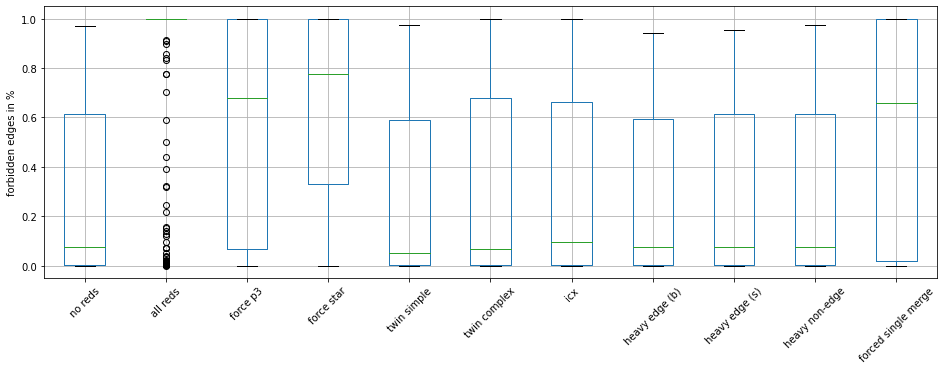

In [40]:
df['forbs%'] = df['dist4+'] / (df['n-clean'] * (df['n-clean']-1) / 2)
for r in reds:
    df[f'forbs% after {r}'] = df[f'forbs {r}'] / (df[f'after {r}'] * (df[f'after {r}']-1) / 2)
    df[f'forbs% after {r}'].fillna(1, inplace=True)

df.boxplot(['forbs%'] + [f'forbs% after {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(['no reds'] + reds)
plt.ylabel('forbidden edges in %')
plt.savefig('plots/pace-kernel-forbs.pdf', bbox_inches='tight')

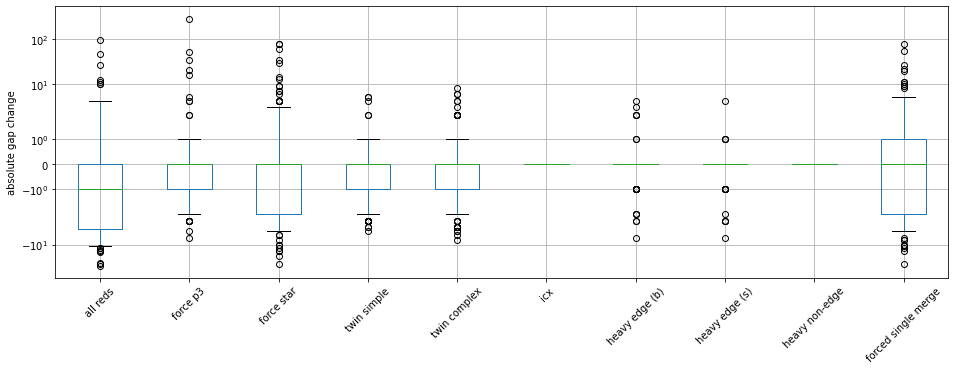

In [41]:
for r in reds:
    df[f'gap change {r}'] = (df.upper - df[f'lower after {r}']) - df.gap
    
df[df.gap>0].boxplot([f'gap change {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('absolute gap change')
plt.yscale('symlog')
plt.savefig('plots/pace-kernel-gap.pdf', bbox_inches='tight')

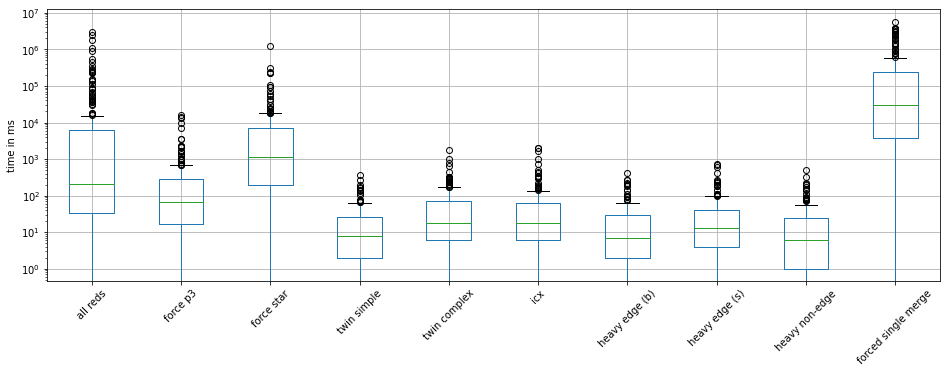

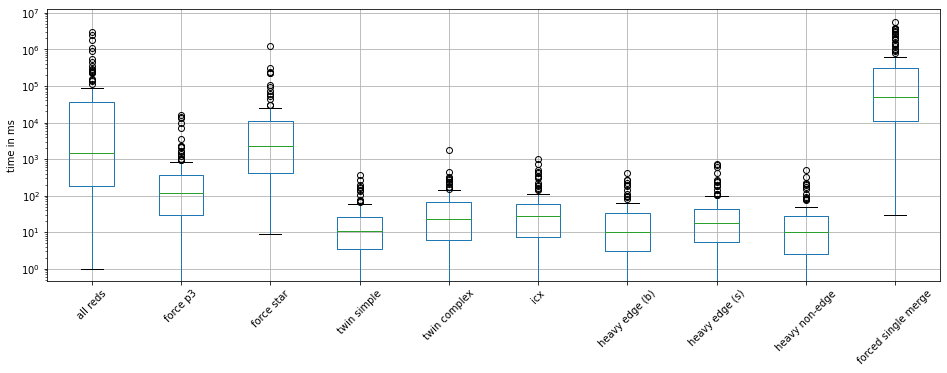

In [42]:
df.boxplot(column=[f'time {r}' for r in reds], rot=45)
plt.semilogy()
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('time in ms')
plt.savefig('plots/pace-kernel-time.pdf', bbox_inches='tight')
plt.show()

df[df.gap>0].boxplot(column=[f'time {r}' for r in reds], rot=45)
plt.semilogy()
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('time in ms')
plt.savefig('plots/pace-kernel-time2.pdf', bbox_inches='tight')

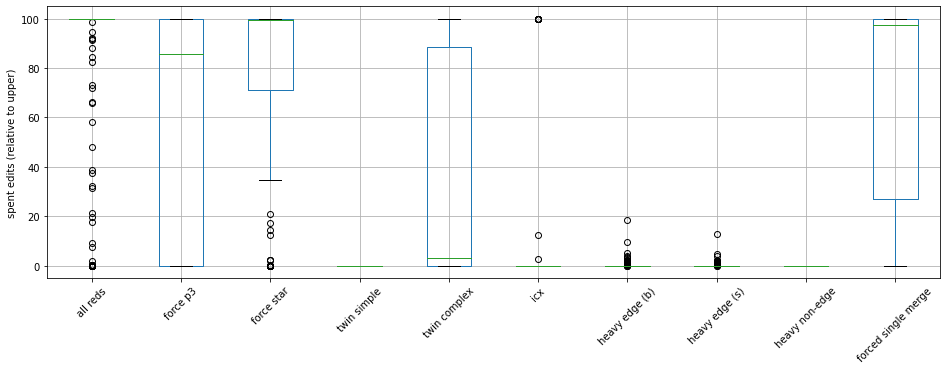

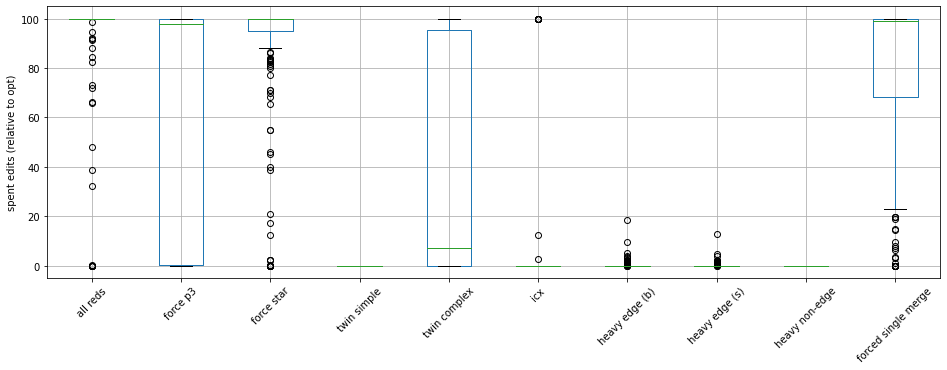

In [43]:
for r in reds:
    df[f'spend%upper {r}'] = (df[f'spend {r}'] / df.upper * 100)
    df[f'spend%opt {r}'] = (df[f'spend {r}'] / df.opt * 100)
    
df.boxplot(column=[f'spend%upper {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('spent edits (relative to upper)')  
plt.savefig('plots/pace-kernel-edits.pdf', bbox_inches='tight')
plt.show()

df[df.solved>0].boxplot(column=[f'spend%opt {r}' for r in reds], rot=45)
plt.gcf().set_size_inches(16,5)
plt.gca().set_xticklabels(reds)
plt.ylabel('spent edits (relative to opt)')   
plt.savefig('plots/pace-kernel-edits2.pdf', bbox_inches='tight')
plt.show()

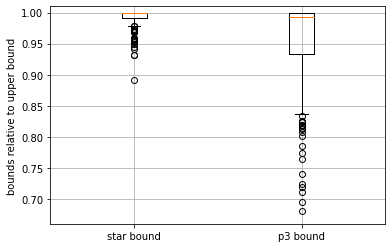

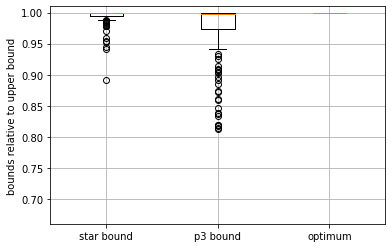

In [44]:
solved = df.solved==True
low_rel = df.low_star/df.upper
opt_rel = df.opt/df.upper
p3_rel = df.low_p3/df.upper

plt.boxplot([low_rel, p3_rel], labels=['star bound', 'p3 bound'])
plt.ylabel('bounds relative to upper bound')
plt.grid()
plt.ylim(bottom=0.66, top=1.01)
plt.savefig('plots/pace-lower.pdf', bbox_inches='tight')
plt.show()

plt.boxplot([low_rel[solved], p3_rel[solved], opt_rel[solved]], labels=['star bound', 'p3 bound', 'optimum'])
plt.ylabel('bounds relative to upper bound')
plt.grid()
plt.ylim(bottom=0.66, top=1.01)
plt.savefig('plots/pace-lower2.pdf', bbox_inches='tight')
plt.show()

In [45]:
(df.upper - df.opt)[df.solved==1].sum()

0